<a href="https://colab.research.google.com/github/kevin-bcs/kevin_carbajal/blob/main/L04_Red_Neuronal_Densa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Densa (Perceptrón Multicapa MLP)
## Dr. Carlos Villaseñor

Paso 1. Correr paqueterias

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paso 2. Corre el siguiente bloque con diferentes funciones de activación

In [59]:
# Funciones de activación
def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

Paso 3. Completa la siguiente clase para programar la red densa

In [101]:
class MLP:

  def __init__(self, layers_dims,
               hidden_activation=relu,
               output_activation=sigmoid,
               learning_rate=0.1):

      # Instance Attributes
    self.L = len(layers_dims) - 1
    self.w = [None] * (self.L + 1)
    self.b = [None] * (self.L + 1)
    self.f = [None] * (self.L + 1)
    self.layers = layers_dims
    self.eta = learning_rate

    # Initialize weights
    for l in range(1, self.L + 1):
      self.w[l] = -1 +2 * np.random.rand(layers_dims[l], layers_dims[l-1])
      self.b[l]= -1 +2 * np.random.rand(layers_dims[l],1)
      if l == self.L:
        self.f[l] = output_activation
      else:
        self.f[l] = hidden_activation

  def predict(self, X):
    A = X.copy()
    for l in range(1, self.L + 1):
      Z = self.w[l] @ A + self.b[l]
      A = self.f[l](Z)
    return A

  def fit(self, X, Y, epochs=500):

    # Number of samples
    p = X.shape[1]

    #Gradient Descent
    for _ in range(epochs):

      # Initialize activations and their derivatives
      A = [None] * (self.L + 1)
      dA = [None] * (self.L + 1)
      lg = [None] * (self.L + 1)

      # Propagation
      A[0] = X.copy()
      for l in range (1, self.L + 1):
        Z = self.w[l] @ A[l-1] + self.b[l]
        A[l], dA[l] = self.f[l](Z, derivative=True)


      # Backpropagation
      for l in range(self.L, 0, -1):
        if l == self.L:
          lg[l] = (Y - A[l]) * dA[l]
        else:
          lg[l] = (self.w[l+1].T @ lg[l+1]) * dA[l]

      # Update parameters
      for l in range (1, self.L + 1):
        self.w[l] += (self.eta/p) * (lg[l] @ A[l-1].T)
        self.b[l] += (self.eta/p) * np.sum(lg[l])


Paso 4. Ejecuta la siguiente linea que te ayudará a dibujar las predicciones de la red

In [102]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

Paso 5. Crea los datos para de la compuerta XOR

In [103]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

Paso 6. Corre el siguiente código para ver la predicción de la red antes de entrenar

[[0.11517108 0.13220475 0.24360977 0.38152955]]


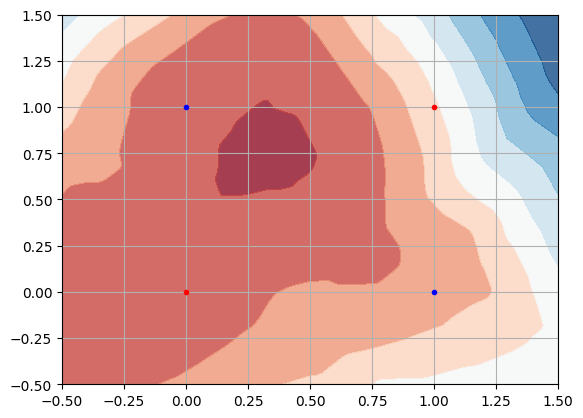

In [104]:
net = MLP((2,100,1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Paso 7. Repite el código anterior pero agrega el entrenamiento

[[0.08535673 0.9294781  0.92308228 0.07091264]]


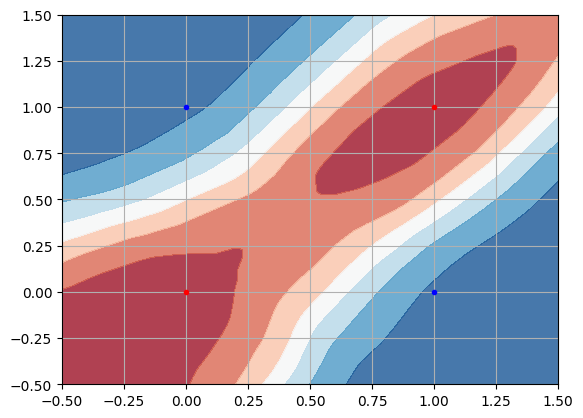

In [105]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Paso 8. Crea una red neuronal, y entrenala para el dataset "blobs.csv", Dibuja tus resultados al igual que el problema XOR

Paso 9. Crea una red neuronal, y entrenala para el dataset "moons.csv", Dibuja tus resultados al igual que el problema XOR

Paso 10. Crea una red neuronal, y entrenala para el dataset "circles.csv", Dibuja tus resultados al igual que el problema XOR

Paso 11. Puedes usar bibliotecas como sklearn para usar esta red neuronal ([referencia](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). En el siguiente código usa cualquiera de los dataset anteriores para entrenar un clasificador (puedes usar un regresor importando sklearn.neural_network.MLPRegressor)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Lee aqui uno de los archivos csv anteriores y selecciona las variables


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(x, y)
print('Desempeño: ', model.score(x, y))